# **Ciencia de Datos 2022**

### Alan Reyes-Figueroa

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

from sklearn import cluster, datasets
from sklearn.datasets import make_spd_matrix

from sklearn.mixture import GaussianMixture as GMM

## Data

In [2]:
# define the number of samples to be drawn
n_samples = 100

In [3]:
# define the mean points for each of the systhetic cluster centers
t_means = [[8.4, 8.2], [1.4, 1.6], [2.4, 5.4], [6.4, 2.4]]

# for each cluster center, create a Positive semidefinite convariance matrix
t_covs = []
for s in range(len(t_means)):
    t_covs.append(make_spd_matrix(2))

X = []
for mean, cov in zip(t_means,t_covs):
    x = np.random.multivariate_normal(mean, cov, n_samples)
    X += list(x)

X = np.array(X)
#np.random.shuffle(X)
print("Dataset shape:", X.shape)

Dataset shape: (400, 2)


In [4]:
# Create a grid for visualization purposes 
x = np.linspace(np.min(X[...,0])-1,np.max(X[...,0])+1,100)
y = np.linspace(np.min(X[...,1])-1,np.max(X[...,1])+1,80)

U,V = np.meshgrid(x,y)

pos = np.array([U.flatten(),V.flatten()]).T
print(pos.shape)
print(np.max(pos[...,1]))

(8000, 2)
11.479516091310428


In [5]:
# define the number of clusters to be learned
k = 4

# create and initialize the cluster centers and the weight paramters
weights = np.ones((k)) / k
means = np.random.choice(X.flatten(), (k,X.shape[1]))
print(means)
print(weights)

[[ 3.96093694  1.76764833]
 [-0.23332825  9.81768124]
 [ 2.08801726  2.65847269]
 [ 6.69380442  6.19709538]]
[0.25 0.25 0.25 0.25]


In [6]:
# create and initialize a Positive semidefinite convariance matrix 
cov = []
for i in range(k):
    cov.append(make_spd_matrix(X.shape[1]))

cov = np.array(cov)
print(cov.shape)

(4, 2, 2)


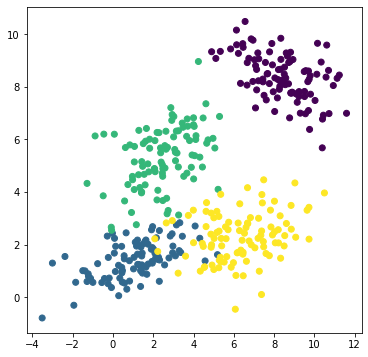

In [7]:
colors = []
for i in range(0, k):
    colors = colors + [i]*n_samples
colors = np.array(colors)

plt.figure(figsize=(6,6))
plt.scatter(X[:,0], X[:,1], c=colors)
plt.show()

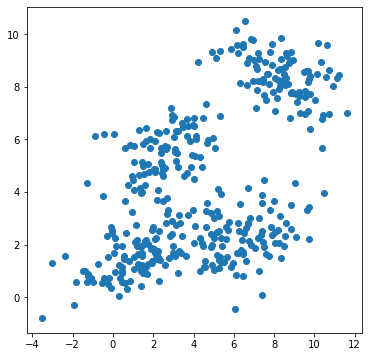

In [8]:
plt.figure(figsize=(6,6))
plt.scatter(X[:,0], X[:,1])
plt.show()

## Gaussian Mixture Model (GMM)

In [9]:
gmm = GMM(n_components=4).fit(X)

In [10]:
gmm.covariances_

array([[[ 2.20552445, -0.62885402],
        [-0.62885402,  0.76006152]],

       [[ 2.72919177,  0.83098844],
        [ 0.83098844,  0.67535482]],

       [[ 2.62993779,  0.47286661],
        [ 0.47286661,  0.86766571]],

       [[ 1.92046476,  0.54889249],
        [ 0.54889249,  0.94569365]]])

In [11]:
gmm.means_

array([[8.37779441, 8.37124487],
       [1.28723737, 1.60019011],
       [6.42339441, 2.26534241],
       [2.50741565, 5.42193948]])

In [12]:
gmm.weights_

array([0.25203266, 0.27724835, 0.23904303, 0.23167596])

In [13]:
labels = gmm.predict(X)

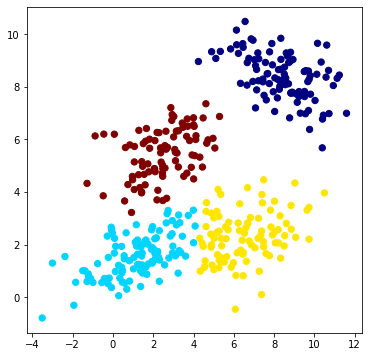

In [14]:
plt.figure(figsize=(6,6))
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap=plt.cm.jet)
plt.show()

In [15]:
from matplotlib.patches import Ellipse

In [16]:
def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height, angle, **kwargs))

In [17]:
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap=plt.cm.jet, zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

In [18]:
gmm = GMM(n_components=4, random_state=42)

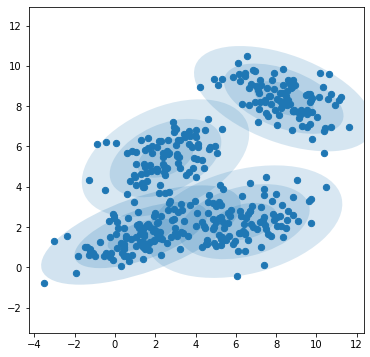

In [19]:
plt.figure(figsize=(6,6))
plot_gmm(gmm, X, label=False)
plt.show()

## Ejemplo (Moons dataset)

In [20]:
X, colors = datasets.make_moons(200, noise=.1, random_state=0)

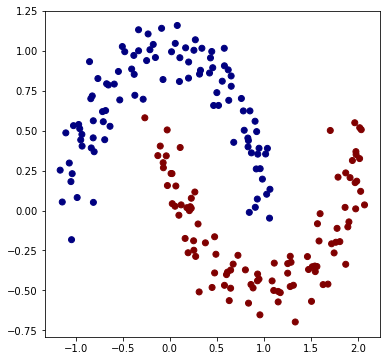

In [21]:
plt.figure(figsize=(6,6))
plt.scatter(X[:,0], X[:,1], c=colors, cmap=plt.cm.jet)
plt.show()

In [26]:
gmm = GMM(n_components=10, random_state=2021)

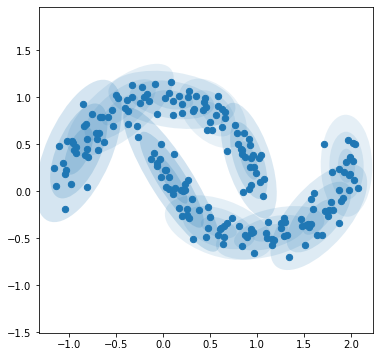

In [27]:
plt.figure(figsize=(6,6))
plot_gmm(gmm, X, label=False)
plt.show()

In [28]:
labels = gmm.predict(X)

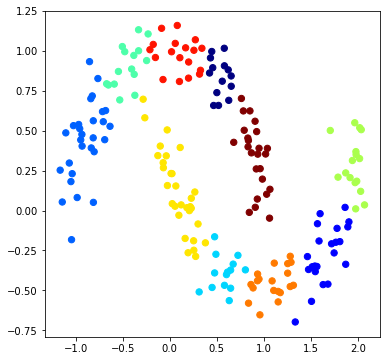

In [29]:
plt.figure(figsize=(6,6))
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap=plt.cm.jet)
plt.show()

In [30]:
labels[colors == 0]

array([9, 2, 9, 9, 4, 2, 9, 0, 8, 2, 8, 4, 8, 9, 6, 9, 9, 2, 4, 0, 4, 9,
       2, 2, 2, 9, 0, 8, 8, 2, 9, 2, 8, 8, 2, 2, 2, 9, 0, 8, 4, 9, 4, 0,
       9, 4, 2, 8, 9, 2, 2, 4, 8, 4, 8, 8, 2, 9, 0, 9, 9, 2, 8, 2, 9, 9,
       4, 2, 2, 9, 0, 4, 4, 9, 8, 9, 8, 4, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2,
       0, 2, 8, 8, 2, 4, 2, 0, 9, 9, 4, 8], dtype=int64)

In [31]:
labels[colors == 1]

array([1, 6, 1, 1, 7, 7, 6, 1, 7, 6, 5, 7, 7, 6, 1, 1, 6, 7, 6, 5, 3, 6,
       3, 6, 1, 6, 7, 6, 5, 7, 7, 6, 1, 7, 1, 3, 3, 6, 3, 6, 3, 5, 3, 5,
       6, 3, 5, 5, 5, 1, 1, 3, 6, 1, 5, 6, 1, 1, 5, 3, 6, 6, 6, 7, 5, 6,
       7, 1, 7, 5, 6, 6, 6, 7, 6, 3, 1, 3, 7, 6, 6, 7, 1, 3, 1, 3, 1, 7,
       6, 7, 5, 1, 5, 1, 5, 7, 6, 5, 6, 1], dtype=int64)

In [32]:
# redefine classes

class0 = list(set(labels[colors == 0]))
class1 = list(set(labels[colors == 1]))
print (class0, class1)

for i in class0:
    labels[colors == i] = -1

for i in class1:
    labels[colors == i] = 1

labels = (1 + labels)//2

[0, 2, 4, 6, 8, 9] [1, 3, 5, 6, 7]


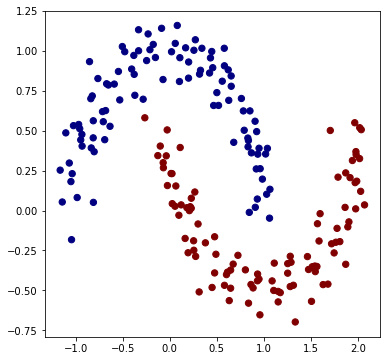

In [33]:
plt.figure(figsize=(6,6))
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap=plt.cm.jet)
plt.show()